 # Gastric Cancer Prediction
 
Explore into the exploration and preparation of a dataset focused on gastric cancer prediction. By importing essential libraries and analyzing the dataset, we begin by performing an in-depth exploratory data analysis (EDA) to understand the structure and characteristics of the data. The dataset comprises various microRNA-target interaction predictions, which are crucial for understanding gene regulation mechanisms related to gastric cancer.

The notebook includes steps to clean and preprocess the data, handling missing values, and categorizing features into different types—categorical, non-categorical, discrete, and continuous. These steps lay the groundwork for developing robust machine learning models to predict and understand gastric cancer outcomes based on microRNA interactions.
 
 ## Import Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score

- Suppress Warnings

In [2]:
warnings.filterwarnings("ignore")

- Set `seaborn` plot style

In [3]:
sns.set(style="whitegrid")

## Exploratory Data Analysis

Dataset URL: "https://raw.githubusercontent.com/cogxen/datasets/main/gastric-cancer/gastric-cancer.xlsx"

- Load the dataset
- Assign the dataset to a variable
- Set plot style (seaborn)

In [4]:
dataset_url = "https://raw.githubusercontent.com/cogxen/datasets/main/gastric-cancer/gastric-cancer.xlsx"

# Assign the dataset
gastric_cancer = pd.read_excel(dataset_url)

- Display the first five (5) rows of the DataFrame

In [5]:
gastric_cancer.head()

,Unnamed: 0,mature_mirna_acc,mature_mirna_id,target_symbol,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum
0,1,MIMAT0002820,hsa-miR-497-5p,SEMA6D,80031.0,ENSG00000137872,1,4,1,2,1,1,1,1,8,8
1,2,MIMAT0002820,hsa-miR-497-5p,AK4,205.0,ENSG00000162433,1,2,0,1,1,1,1,1,7,7
2,3,MIMAT0002820,hsa-miR-497-5p,CCNE1,898.0,ENSG00000105173,2,4,0,2,2,1,2,2,7,7
3,4,MIMAT0002820,hsa-miR-497-5p,CD2AP,23607.0,ENSG00000198087,1,2,0,1,1,1,1,1,7,7
4,5,MIMAT0002820,hsa-miR-497-5p,CDK17,5128.0,ENSG00000059758,2,2,0,1,2,1,1,1,7,7


- Display the last five (5) rows of the DataFrame

In [6]:
gastric_cancer.tail()

,Unnamed: 0,mature_mirna_acc,mature_mirna_id,target_symbol,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum
3706,3707,MIMAT0002820,hsa-miR-497-5p,ZP1,22917.0,ENSG00000149506,1,0,0,0,0,0,0,0,1,1
3707,3708,MIMAT0002820,hsa-miR-497-5p,ZP3,7784.0,ENSG00000188372,0,0,1,0,0,0,0,0,1,1
3708,3709,MIMAT0002820,hsa-miR-497-5p,ZPBP2,124626.0,ENSG00000186075,0,0,1,0,0,0,0,0,1,1
3709,3710,MIMAT0002820,hsa-miR-497-5p,ZRANB1,54764.0,ENSG00000019995,2,0,0,0,0,0,0,0,1,1
3710,3711,MIMAT0002820,hsa-miR-497-5p,ZSWIM5,57643.0,ENSG00000162415,0,0,0,0,0,0,1,0,1,1


- Display the current shape of the dataset

In [7]:
gastric_cancer.shape

(3711, 16)

- Drop the `Unnamed: 0` column

In [8]:
gastric_cancer = gastric_cancer.drop(["Unnamed: 0", "mature_mirna_acc", "mature_mirna_id"], axis=1)

- Display the new shape of the dataset

In [9]:
gastric_cancer.shape

(3711, 13)

The columns `Unnamed: 0`, `mature_mirna_acc`, and `mature_mirna_id` were removed from the dataset. The `Unnamed: 0` column is redundant as it duplicates the implicit row index of the DataFrame. The `mature_mirna_acc` and `mature_mirna_id` columns represent accession numbers and standardized identifiers, respectively, for mature miRNA sequences. As these columns do not contribute to the underlying data analysis or modeling objectives, they were excluded to streamline the dataset and enhance computational efficiency.

- Preview all the columns

In [10]:
gastric_cancer.columns

Index(['target_symbol', 'target_entrez', 'target_ensembl', 'diana_microt',
       'elmmo', 'microcosm', 'miranda', 'mirdb', 'pictar', 'pita',
       'targetscan', 'predicted.sum', 'all.sum'],
      dtype='object')

Based on the common terminology used in bioinformatics and miRNA research, here are more informative descriptions for your dataset columns. 

**Core Information**

1. `target_symbol` - Gene symbol of the predicted target gene for the miRNA
2. `target_entrez` - Entrez Gene ID of the predicted target gene
3. `target_ensembl` - Ensembl ID of the predicted target gene

**Prediction Scores**

4. `diana_microt` - Predicted interaction confidence score from Diana-microT
5. `elmmo` - Predicted interaction confidence score from elMMo
6. `microcosm` - Predicted interaction confidence score from MicroCosm
7. `miranda` - Predicted interaction confidence score from miRanda
8. `mirdb` - Predicted interaction confidence score from miRDB 
9. `pictar` - Predicted interaction confidence score from PicTar
10. `pita` - Predicted interaction confidence score from PITA
11. `targetscan` - Predicted interaction confidence score from TargetScan

**Summary Metrics**

12. `predicted.sum` - Cumulative predicted interaction confidence score
13. `all.sum` - Total number of prediction tools indicating a potential miRNA-target interaction

NOTE: The terms "confidence score" and "interaction" are used to provide a more precise description of the data.

**Biological Context**

**HER2** is a proto-oncogene frequently overexpressed in gastric adenocarcinoma, contributing significantly to tumorigenesis and progression.

The dataset encompasses a compendium of computational predictions for **microRNA-target interactions**, providing a foundation for elucidating post-transcriptional gene regulatory mechanisms implicated in gastric cancer pathogenesis.

- Preview the summation of null values per column

In [11]:
gastric_cancer.isnull().sum()

target_symbol     51
target_entrez     76
target_ensembl    32
diana_microt       0
elmmo              0
microcosm          0
miranda            0
mirdb              0
pictar             0
pita               0
targetscan         0
predicted.sum      0
all.sum            0
dtype: int64

Significant missingness is observed in target-related columns (`target_symbol`, `target_entrez`, `target_ensembl`), indicating potential data incompleteness or inconsistencies in target gene annotation.

- Calculate the count of duplicate records in the DataFrame

In [12]:
gastric_cancer.duplicated().sum()

0

- Preview the statistical summary/descriptive statistics of the DataFrame

In [13]:
gastric_cancer.describe()

,target_entrez,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum
count,3.635000e+03,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,1.926985e+06,0.723525,1.276206,0.111291,0.283212,0.142819,0.106979,0.270547,0.120183,1.877661,1.877661
std,1.353750e+07,0.760964,1.479773,0.379756,1.158973,0.414139,0.328572,0.543615,0.339016,1.312233,1.312233
min,1.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.785500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.592800e+04,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,8.390050e+04,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,1.027244e+08,4.000000,14.000000,4.000000,22.000000,4.000000,3.000000,5.000000,3.000000,8.000000,8.000000


The descriptive statistics provide a preliminary understanding of the dataset's numerical attributes, particularly focusing on central tendencies and dispersion.

- Provide a summary of the DataFrame's structure and data types

In [14]:
gastric_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   target_symbol   3660 non-null   object 
 1   target_entrez   3635 non-null   float64
 2   target_ensembl  3679 non-null   object 
 3   diana_microt    3711 non-null   int64  
 4   elmmo           3711 non-null   int64  
 5   microcosm       3711 non-null   int64  
 6   miranda         3711 non-null   int64  
 7   mirdb           3711 non-null   int64  
 8   pictar          3711 non-null   int64  
 9   pita            3711 non-null   int64  
 10  targetscan      3711 non-null   int64  
 11  predicted.sum   3711 non-null   int64  
 12  all.sum         3711 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 377.0+ KB


- Preview count on unique values in each column of the DataFrame

In [15]:
gastric_cancer.nunique()

target_symbol     3497
target_entrez     3530
target_ensembl    3541
diana_microt         4
elmmo                7
microcosm            5
miranda              8
mirdb                5
pictar               4
pita                 6
targetscan           4
predicted.sum        8
all.sum              8
dtype: int64

### Impute Missing Values

As we observed in the dataset, significant missing values exist within columns associated with target genes, specifically `target_symbol`, `target_entrez`, and `target_ensembl`. This data incompleteness could potentially introduce bias and hinder the effectiveness of subsequent analyses. To mitigate these issues and enhance data integrity, we implemented imputation techniques. For categorical columns (`target_symbol` and `target_ensembl`), where missing values likely represent unannotated gene information, we employed mode imputation to maintain data consistency. Conversely, for the numerical `target_entrez` column, we utilized median imputation to address missing values and reduce the impact of potential outliers. By applying these imputation strategies, we aimed to create a more complete and reliable dataset for subsequent modeling and analysis.

- Impute missing values
    - Perform data imputation to handle missing values in the specified columns
    - Mode imputation for categorical columns
    - Median imputation for numerical columns

*This is a common preprocessing step in data analysis to ensure data completeness before further modeling or analysis.*



In [16]:
# Initialize the imputer
median_imp = SimpleImputer(strategy="median")

# List of categorical columns
categorical_cols = ["target_symbol", "target_ensembl"]

# Impute missing values in categorical columns with the mode
for col in categorical_cols:
    mode_value = gastric_cancer[col].mode()[0]
    gastric_cancer[col].fillna(mode_value, inplace=True)

# Impute missing values in the numerical column with the median
gastric_cancer[['target_entrez']] = median_imp.fit_transform(gastric_cancer[['target_entrez']])

- Preview the impact of imputation by examining the count of values in each column in the processed DataFrame

In [17]:
gastric_cancer.isnull().sum()

target_symbol     0
target_entrez     0
target_ensembl    0
diana_microt      0
elmmo             0
microcosm         0
miranda           0
mirdb             0
pictar            0
pita              0
targetscan        0
predicted.sum     0
all.sum           0
dtype: int64

The post-imputation analysis indicates a successful resolution of missing value issues within the dataset. The absence of null values across all columns confirms the efficacy of the imputation strategies employed. This outcome is crucial as it ensures data integrity and lays a solid foundation for subsequent analytical endeavors.

### Understanding Feature Types

This is crucial for choosing appropriate analysis and modeling techniques. Categorical features might require encoding before feeding them into models, discrete features might benefit from specific visualization techniques like count plots, and continuous features might be suitable for techniques that analyze trends and distribution.


- Separate the DataFrame into two categories based on their data types
    - `object`
    - `numerical`

In [18]:
for dtype, name in zip([object, np.number], ["Object type columns", "Numerical type columns"]):
    cols = gastric_cancer.select_dtypes(include=dtype).columns
    print(f"{name}:\n{cols}\n")

Object type columns:
Index(['target_symbol', 'target_ensembl'], dtype='object')

Numerical type columns:
Index(['target_entrez', 'diana_microt', 'elmmo', 'microcosm', 'miranda',
       'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum'],
      dtype='object')



**Why classify features?**

Feature classification is a fundamental step in data preprocessing and exploratory data analysis (EDA). It provides essential insights into the nature of your data.

- Feature classification
    - Categorical features - nominal or ordinal attributes representing distinct groups or categories
    - Numerical features - quantitative attributes measured on a continuous or discrete scale
        - Discretes - numerical data with a finite set of distinct values, often representing counts or frequencies
        - Continuous - numerical data with an infinite set of possible values within a given range, representing measurements or quantities


By categorizing features based on these criteria, we can effectively prepare and analyze data for subsequent modeling tasks.

In [19]:
# Define feature classification function
def feature_classification(data):
    categorical = [col for col in data.columns if data[col].dtype == "object" and data[col].nunique() < 20]
    non_categorical = [col for col in data.columns if data[col].dtype == "object" and data[col].nunique() >= 20]
    discrete = [col for col in data.columns if data[col].dtype in ["int64", "float64"] and data[col].nunique() < 10]
    continuous = [col for col in data.columns if data[col].dtype in ["int64", "float64"] and data[col].nunique() >= 10]
    
    return categorical, non_categorical, discrete, continuous

- Apply the feature classification function, `feature_classification`
- Preview the feature results
    - Categorical
    - Non-categorical
    - Discrete
    - Continuous 

In [20]:
# Apply the feature_classification
categorical, non_categorical, discrete, continuous = feature_classification(gastric_cancer)

feature_types = {
    "Categorical features": categorical,
    "Non-categorical features": non_categorical,
    "Discrete features": discrete,
    "Continuous features": continuous
}

# Preview results
for feature_type, features in feature_types.items():
    print(f"{feature_type}: {features}\n")

Categorical features: []

Non-categorical features: ['target_symbol', 'target_ensembl']

Discrete features: ['diana_microt', 'elmmo', 'microcosm', 'miranda', 'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum']

Continuous features: ['target_entrez']



### Visualizations

To gain a holistic understanding of the dataset, a comprehensive visualization strategy encompassing all feature types is essential. While the preceding section focused on discrete features, a broader approach is necessary to uncover underlying patterns and relationships.

#### Discrete Variables

Visualizing discrete variables in the data analysis process is crucial because it helps you quickly understand the distribution of categorical data. 

1. Discrete variables, while represented numerically, often behave categorically as they take on a limited set of distinct values. To effectively explore their distribution and identify potential patterns, count plots are employed.
2. By visualizing these features, insights into data composition, potential class imbalances, and feature relationships can be uncovered, informing subsequent analysis and modeling decisions.

So now, 
- Generate countplots for each discrete variables
- Display the frequency of each category
    - Analyze the distributions - examine the resulting plots to assess the frequency of occurrence for each distinct value
    - Identify patterns - look for any imbalances, outliers, or unexpected value combinations that might warrant further investigation

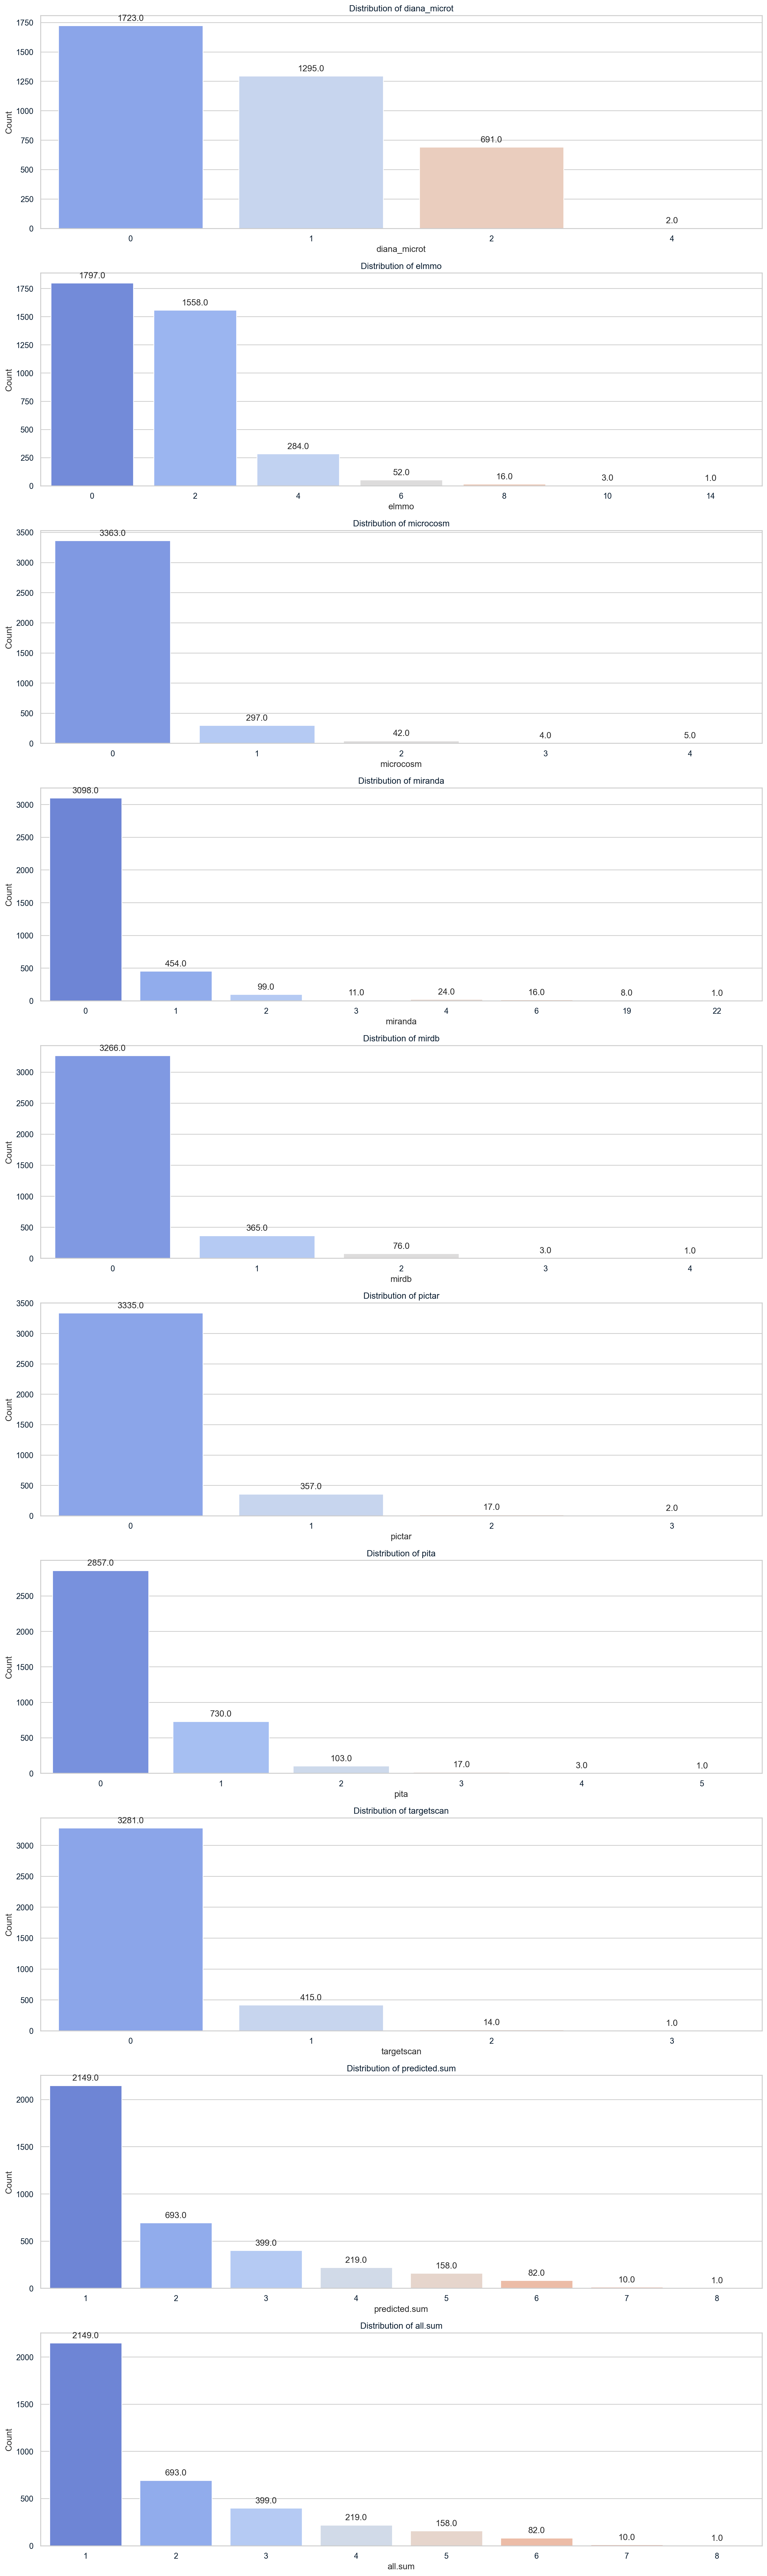

In [21]:
fig, axes = plt.subplots(len(discrete), 1, figsize=(15, len(discrete)*5))
for i, ax in zip(discrete, axes.flatten()):
    sns.countplot(x=i, data=gastric_cancer, palette="coolwarm", ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height}", xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10), textcoords="offset points",
                    ha="center", va="center")
    ax.set_title(f"Distribution of {i}")
    ax.set_xlabel(i)
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

By systematically analyzing these discrete features, a deeper understanding of the dataset can be achieved, informing subsequent modeling and decision-making processes.

#### Continuous Variables

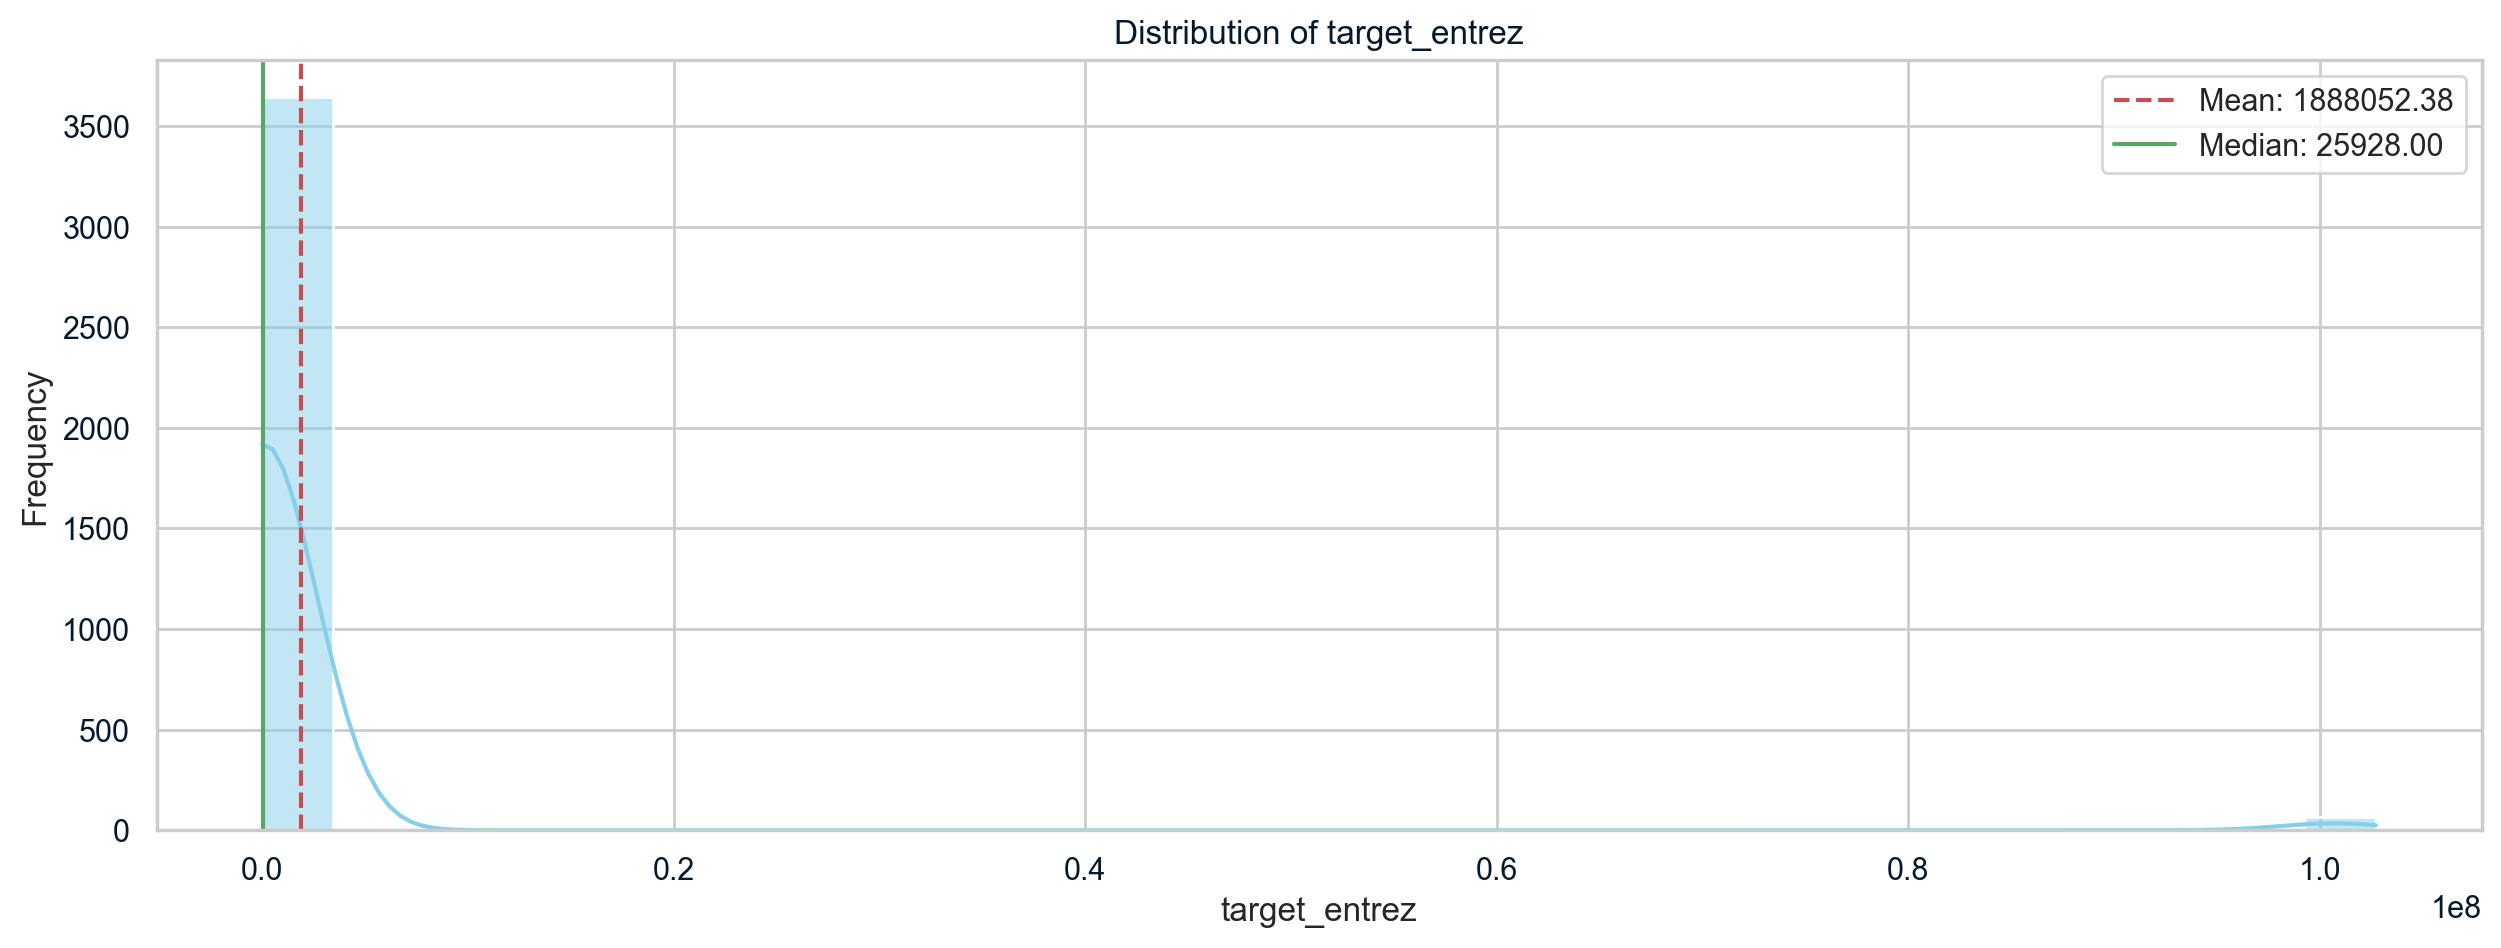

In [22]:
fig, axes = plt.subplots(len(continuous), 1, figsize=(15, len(continuous)*5), squeeze=False)

for i, ax in enumerate(axes.flat):
    sns.histplot(gastric_cancer[continuous[i]], bins=30, kde=True, color="skyblue", ax=ax)
    ax.set(title=f"Distribution of {continuous[i]}", xlabel=continuous[i], ylabel="Frequency")
    ax.grid(True)
    
    # Text annotation for mean and median
    mean_val = gastric_cancer[continuous[i]].mean()
    median_val = gastric_cancer[continuous[i]].median()
    ax.axvline(mean_val, color="r", linestyle="--", label=f"Mean: {mean_val:.2f}")
    ax.axvline(median_val, color="g", linestyle="-", label=f"Median: {median_val:.2f}")
    ax.legend()

fig.subplots_adjust(hspace=0.5)
plt.show()

The `target_entrez` variable exhibits a pronounced right-skewed distribution with a substantial tail in the upper value range. This pattern suggests a concentration of data points within lower values and the presence of outliers towards the higher end. The mean of 1,888,052.38 significantly exceeds the median of 25,928.00, further reinforcing the right-skewed nature of the distribution.

Given the context of biological datasets, where Entrez IDs serve as unique gene identifiers, this distribution profile may indicate a scenario where a relatively small subset of genes is targeted by microRNAs with higher frequency, while a larger proportion of genes experiences less frequent targeting.

#### Explore the Relationship Between Discrete and Continuous Variables

This will provide insights into how different categories of a discrete variables influence the distribution of continuous variables. It is useful in understanding the impact of categorical factors on numerical outcomes, aiding in the identification of important relatioships.

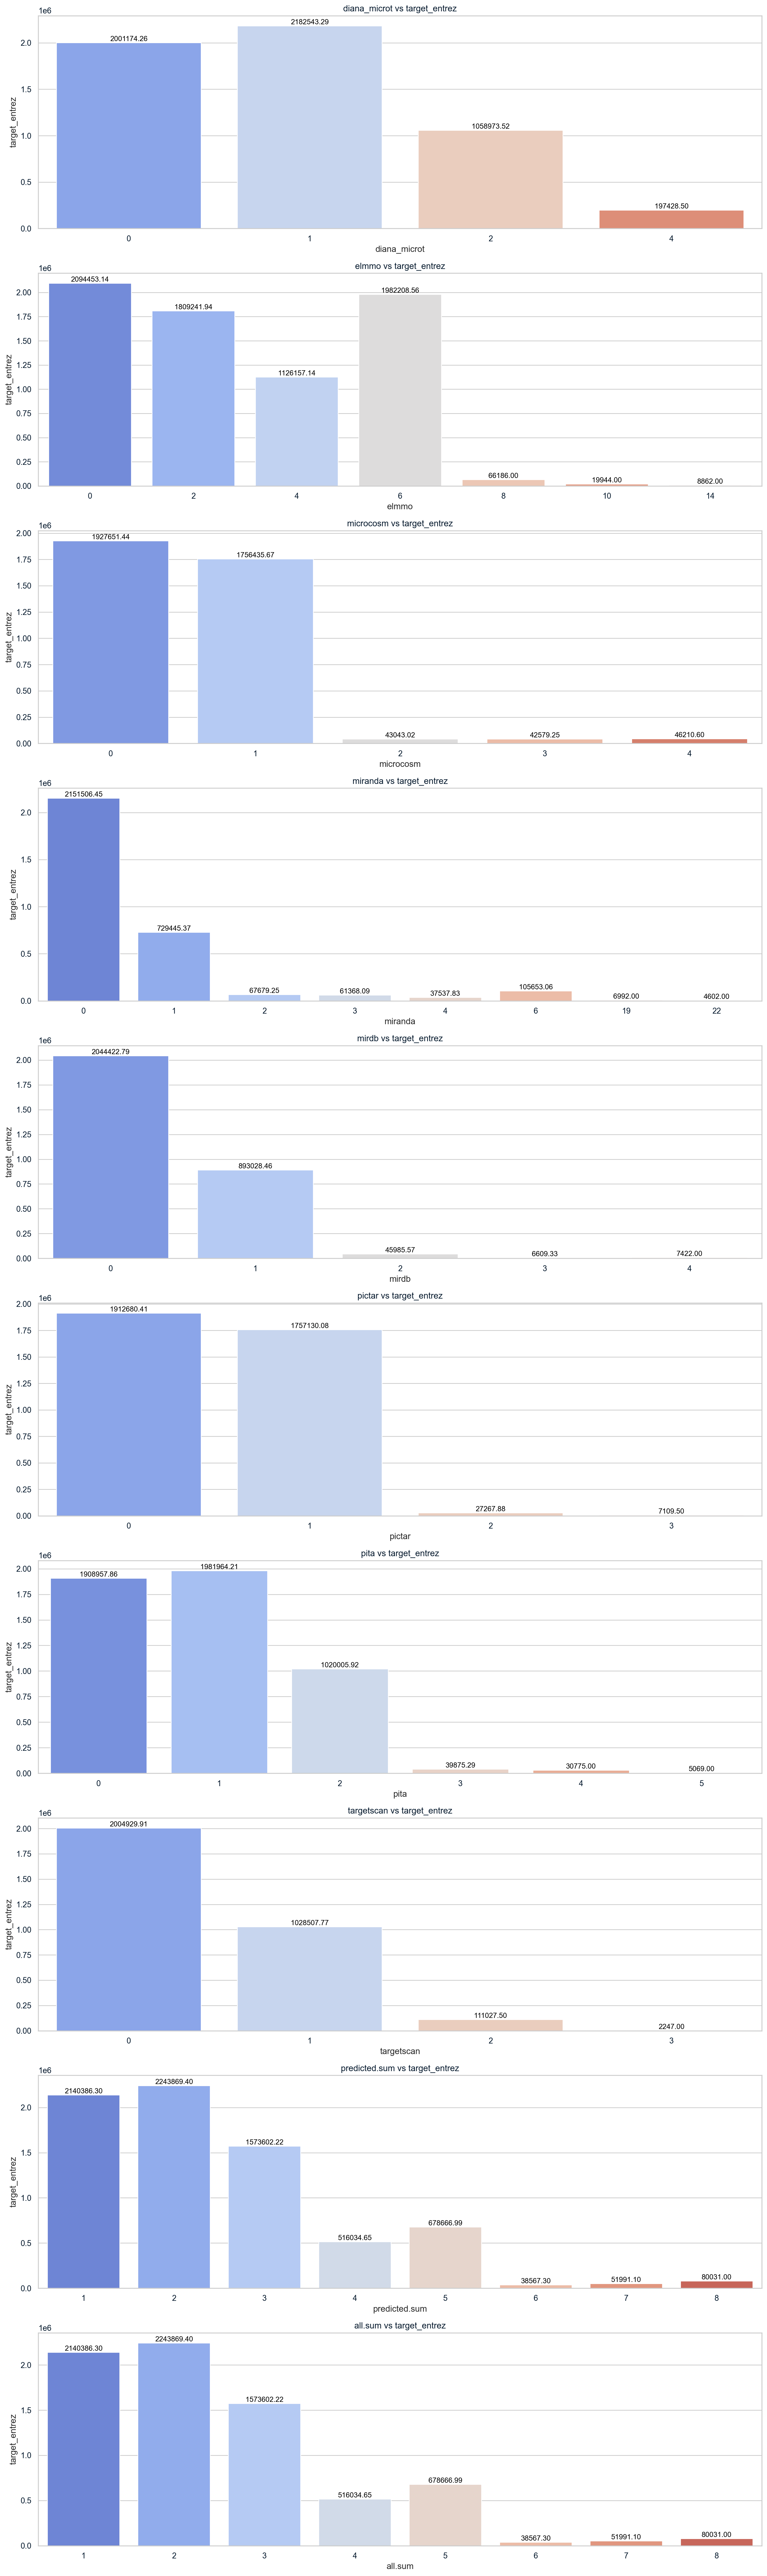

In [23]:
# List of columns names
num_discrete = len(discrete)
num_continuous = len(continuous)

fig, axes = plt.subplots(num_discrete, num_continuous, figsize=(15, 5 * num_discrete), squeeze=False)

for i, dis in enumerate(discrete):
    for j, cont in enumerate(continuous):
        ax = axes[i, j]
        sns.barplot(data=gastric_cancer, x=dis, y=cont, ci=None, ax=ax, palette="coolwarm")
        ax.set_title(f'{dis} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        
        ax.set_xticklabels(ax.get_xticklabels())

plt.tight_layout()
plt.show()

## Data Preprocessing

### Label Encoding

The categorical features `target_symbol` and `target_ensembl` should be converted into numerical representations. This transformation is essential as most machine learning algorithms require numerical input.

- Transform `target_symbol` and `target_ensembl` into numerical

In [24]:
# Ensure the columns are uniformly strings or numbers
gastric_cancer["target_symbol"] = gastric_cancer["target_symbol"].astype(str)
gastric_cancer["target_ensembl"] = gastric_cancer["target_ensembl"].astype(str)

lb = LabelEncoder()
gastric_cancer["target_symbol"] = lb.fit_transform(gastric_cancer["target_symbol"])
gastric_cancer["target_ensembl"] = lb.fit_transform(gastric_cancer["target_ensembl"])

- Do feature selection

In [25]:
X = gastric_cancer.drop(['all.sum'], axis=1)
y = gastric_cancer['all.sum']

# Preview the X DataFrame's data types
X.dtypes

target_symbol       int64
target_entrez     float64
target_ensembl      int64
diana_microt        int64
elmmo               int64
microcosm           int64
miranda             int64
mirdb               int64
pictar              int64
pita                int64
targetscan          int64
predicted.sum       int64
dtype: object

### Split Data into Training and Testing Sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize Numerical Features

In [27]:
sc = StandardScaler()

# Selecting numerical columns
num_col = X_train.select_dtypes(include=["int64", "float64"]).columns

# Fit the scaler on the training data and transform the training set
X_train[num_col] = sc.fit_transform(X_train[num_col])

# Transform the testing set using the same scaler to ensure consistency
X_test[num_col] = sc.transform(X_test[num_col])

- Preview standardize training

In [28]:
X_train.head()

,target_symbol,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum
296,-1.105654,-0.137218,-0.458532,0.386070,0.483948,-0.289983,-0.245847,2.151300,2.790816,-0.489818,-0.351911,1.658890
2633,-0.021138,-0.138666,0.125114,-0.943229,-0.859698,-0.289983,-0.245847,-0.335093,-0.325490,1.362132,-0.351911,-0.658819
507,-1.465825,-0.138777,-1.349052,1.715369,0.483948,-0.289983,-0.245847,-0.335093,-0.325490,-0.489818,2.606932,0.886321
7,0.438080,-0.138577,1.055450,0.386070,1.827593,-0.289983,0.669678,4.637694,2.790816,5.066032,2.606932,3.976600
2759,0.185960,-0.137018,-1.653985,-0.943229,-0.859698,2.442302,-0.245847,-0.335093,-0.325490,-0.489818,-0.351911,-0.658819


- Preview standardize testing sets

In [29]:
X_test.head()

,target_symbol,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum
1237,0.080910,-0.138637,0.752460,0.386070,0.483948,-0.289983,-0.245847,-0.335093,-0.325490,-0.489818,-0.351911,0.113751
1116,-0.539385,-0.138770,-0.143888,-0.943229,0.483948,-0.289983,-0.245847,-0.335093,2.790816,-0.489818,-0.351911,0.113751
2828,0.295012,-0.134691,-1.461703,1.715369,-0.859698,-0.289983,-0.245847,-0.335093,-0.325490,-0.489818,-0.351911,-0.658819
3055,0.685198,-0.138255,-0.481839,0.386070,-0.859698,-0.289983,-0.245847,-0.335093,-0.325490,-0.489818,-0.351911,-0.658819
1174,-0.217231,-0.138693,-0.156512,0.386070,0.483948,-0.289983,-0.245847,-0.335093,-0.325490,-0.489818,-0.351911,0.113751


## RandomForestRegressor

### Model Training

- Train using `RandomForestRegressor`

In [30]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation

- Generate predictions

In [31]:
y_pred_rfr = rfr.predict(X_test)

- Evaluate the model's performance
    - Display MAE, MSE and R-squared

In [32]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rfr)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rfr)}")
print(f"R-squared Score: {r2_score(y_test, y_pred_rfr)}")

Mean Absolute Error: 0.0013593539703903093
Mean Squared Error: 0.001372947510094212
R-squared Score: 0.9992747817458799


The model demonstrates exceptional performance as indicated by the evaluation metrics. The **Mean Absolute Error (MAE)** of 0.00136 suggests highly accurate predictions with minimal average deviation from actual values. Similarly, the **Mean Squared Error (MSE)** of 0.00137 confirms the model's strong predictive capability, as evidenced by the small magnitude of squared errors.

The **R-squared score** of 0.9993 is exceptionally high, signifying that the model explains nearly 99.93% of the variance in the target variable. This exceptional fit indicates a robust model with strong predictive power.

Overall, the RandomForestRegressor model exhibits outstanding performance across all evaluation metrics, demonstrating exceptional accuracy and reliability in predicting the target variable.

### Visualization (Actual vs Predicted Values)

Plot the predicted values against the actual values.

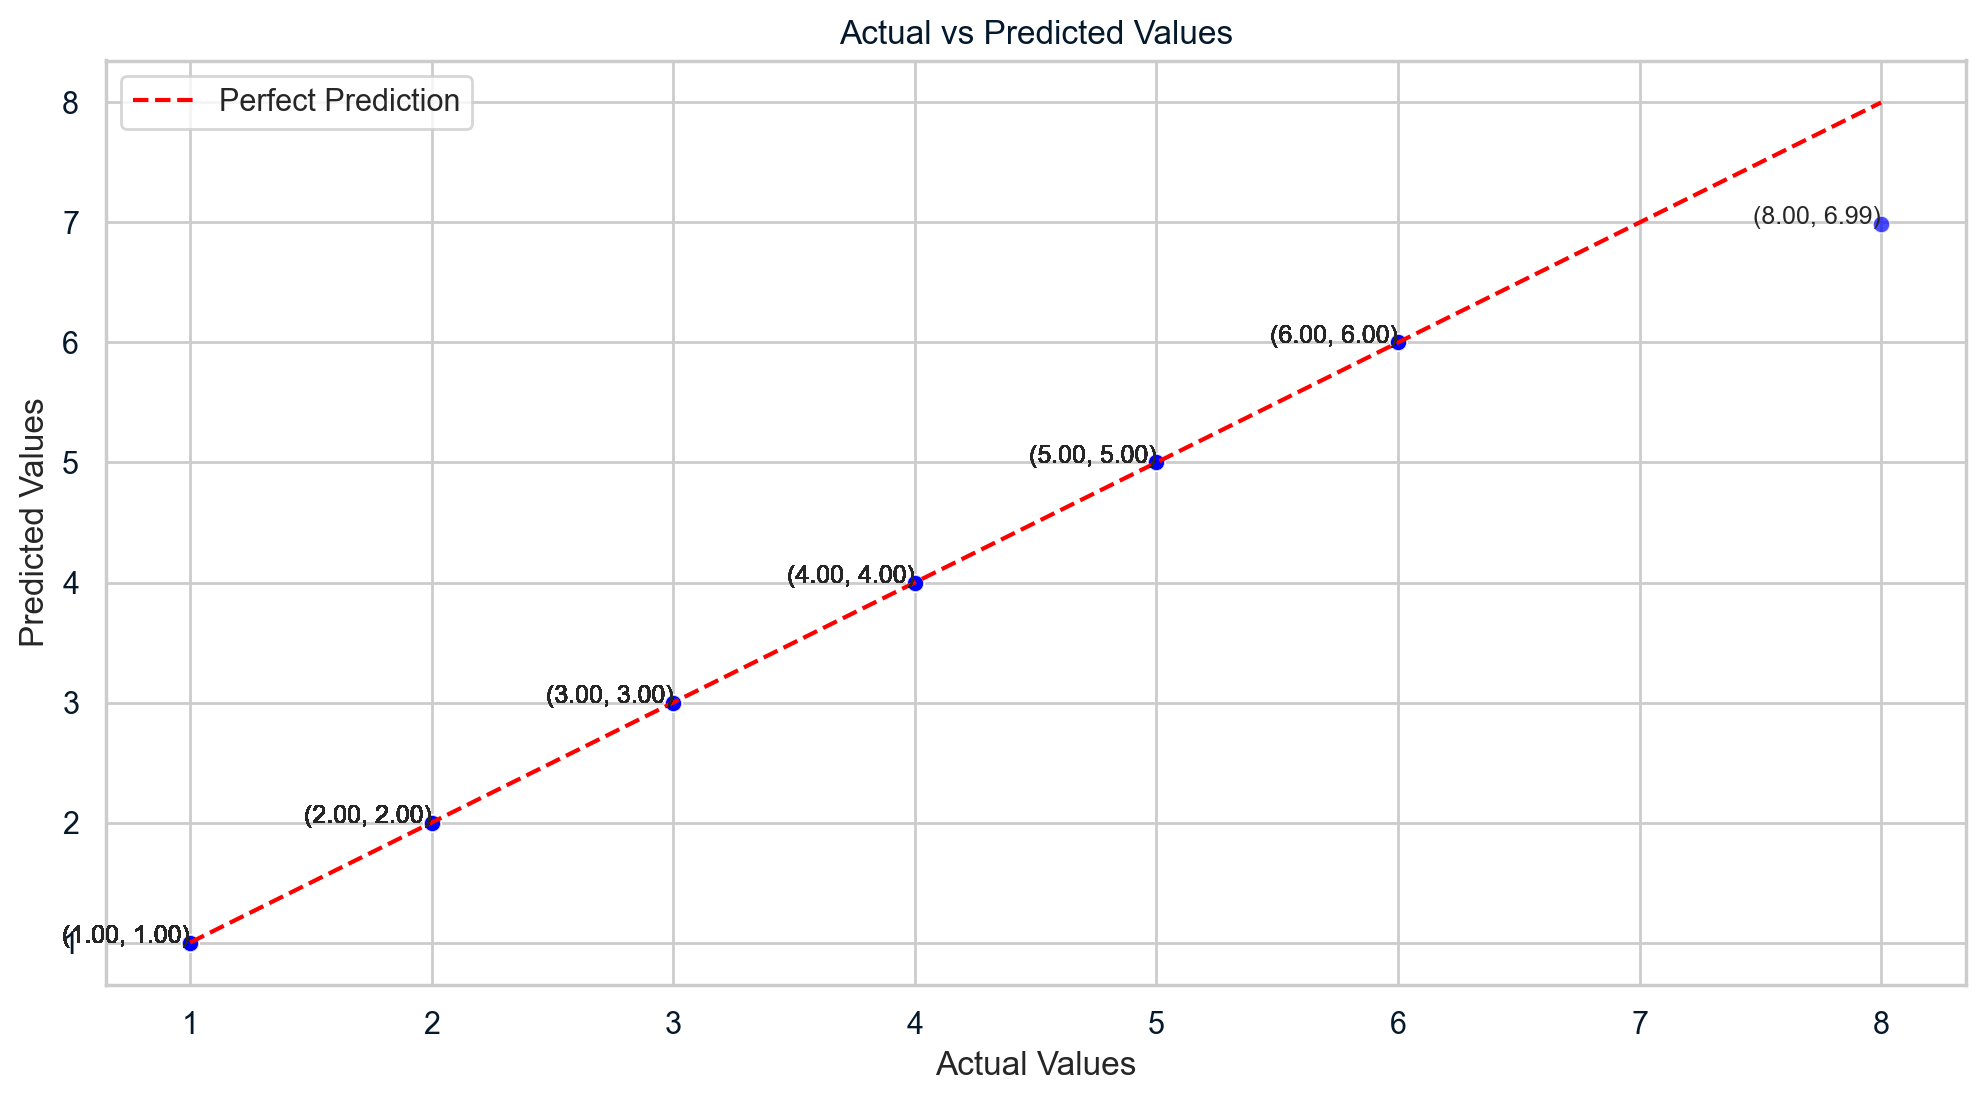

In [33]:
# Create a DataFrame
rfr_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfr})

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual', y='Predicted', data=rfr_results_df, color='blue', alpha=0.7)

# Add text annotation for each data point
for i in range(len(rfr_results_df)):
    plt.text(rfr_results_df['Actual'].iloc[i], rfr_results_df['Predicted'].iloc[i], 
             f"({rfr_results_df['Actual'].iloc[i]:.2f}, {rfr_results_df['Predicted'].iloc[i]:.2f})", 
             fontsize=9, ha='right')

plt.plot([rfr_results_df['Actual'].min(), rfr_results_df['Actual'].max()],
         [rfr_results_df['Actual'].min(), rfr_results_df['Actual'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

The scatter plot visualization indicates a promising predictive capability of the model. A clustering of data points around the diagonal line suggests a strong correlation between predicted and actual values. Nonetheless, the dispersion of points away from the line highlights instances of prediction error, warranting further investigation into potential model improvements.

## DecisionTreeRegressor

### Model Training

- Train using `DecisionTreeRegressor`

In [34]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Model Evaluation

- Generate predictions

In [35]:
y_pred_dtr = dtr.predict(X_test)

- Evaluate the model's performance
    - Display MAE, MSE and R-squared

In [36]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dtr)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dtr)}")
print(f"R-squared Score: {r2_score(y_test, y_pred_dtr)}")

Mean Absolute Error: 0.0013458950201884253
Mean Squared Error: 0.0013458950201884253
R-squared Score: 0.9992890714105283


The model demonstrates exceptional predictive performance as evidenced by the evaluation metrics. The **Mean Absolute Error (MAE)** of 0.00135 indicates a low average magnitude of prediction errors, suggesting high accuracy. While the **Mean Squared Error (MSE)** also reports a value of 0.00135, its focus on the squared differences amplifies the impact of larger errors, though in this case, the overall low value signifies consistent and minimal prediction errors.

The **R-squared** value of 0.9993 is exceptionally high, indicating that the model explains nearly all the variance in the target variable. This exceptional model fit suggests strong predictive power and robustness.

## Model Comparison

Compare the performance of the different models to determine the best-performing one.

- Summarize the evaluation metrics

In [37]:
comparison_df = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'DecisionTreeRegressor'],
    'Mean Absolute Error': [mean_absolute_error(y_test, y_pred_rfr), mean_absolute_error(y_test, y_pred_dtr)],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred_rfr), mean_squared_error(y_test, y_pred_dtr)],
    'R-squared Score': [r2_score(y_test, y_pred_rfr), r2_score(y_test, y_pred_dtr)]
})

- Plot the comparison metrics

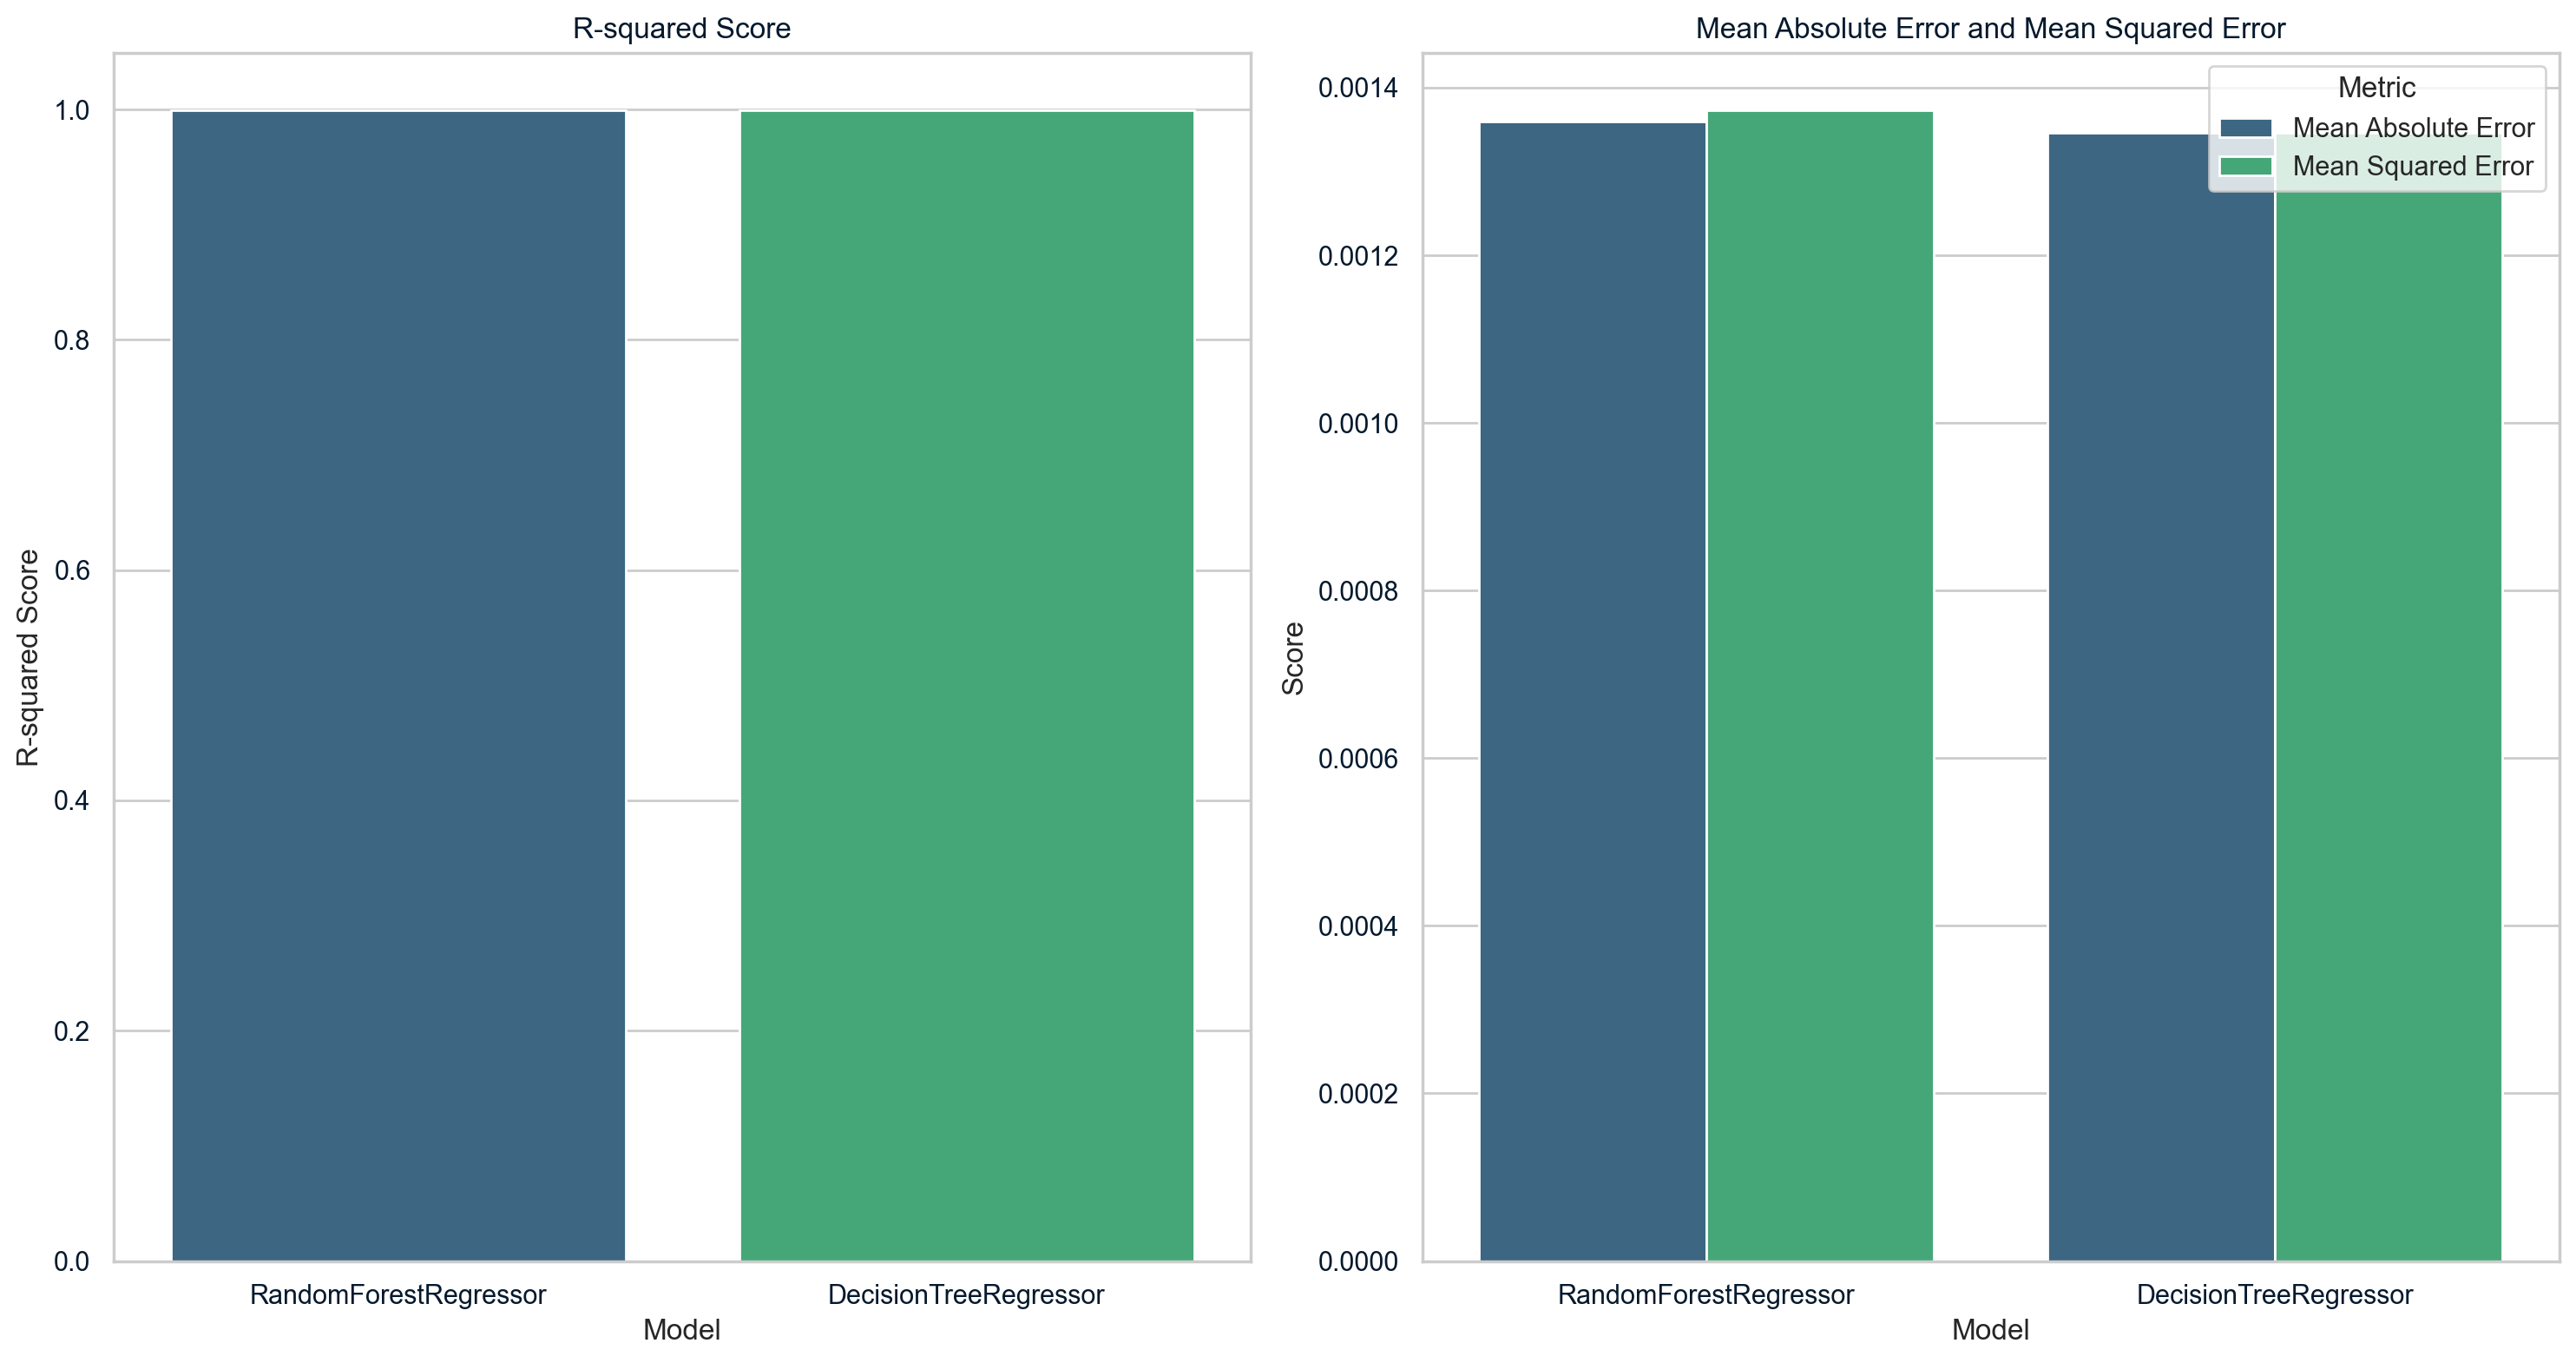

In [38]:
# Reshape the comparison data for plotting
comparison_df_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting in a single figure with subplots
plt.figure(figsize=(15, 8))

# Plot R-squared Score
plt.subplot(1, 2, 1)
r2_score_df = comparison_df[['Model', 'R-squared Score']]
sns.barplot(x='Model', y='R-squared Score', data=r2_score_df, palette='viridis')
plt.title('R-squared Score')
plt.ylabel('R-squared Score')

# Plot zoomed-in MAE and MSE
plt.subplot(1, 2, 2)
# Filter out the MAE and MSE for plotting
mae_mse_df = comparison_df[['Model', 'Mean Absolute Error', 'Mean Squared Error']]
mae_mse_df_melted = mae_mse_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.barplot(x='Model', y='Score', hue='Metric', data=mae_mse_df_melted, palette='viridis')
plt.title('Mean Absolute Error and Mean Squared Error')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

Optimize model performance through hyperparameter tuning.

- Define parameter grid for RandomForestRegressor model

In [39]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

- Initialize GridSearchCV

In [40]:
gs = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                  param_grid=param_grid, 
                  scoring='neg_mean_squared_error', 
                  cv=5, verbose=2, n_jobs=-1)

- Fit the grid search

In [41]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

- Display the best parameters and score

In [42]:
print("Best parameters found: ", gs.best_params_)
print("Best score: ", -gs.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best score:  1.1392167884579119e-06


## Retrain RandomForestRegressor

Apply the best parameters from the hyperparameter tuning result.

- Initialize the model with best parameters
- Train the model

In [43]:
rfr_tuned = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=150, random_state=42)
rfr_tuned.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

- Generate predictions

In [44]:
y_pred_rfr_tuned = rfr_tuned.predict(X_test)

- Evaluate the model's performance

In [45]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rfr_tuned)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rfr_tuned)}")
print(f"R-squared Score: {r2_score(y_test, y_pred_rfr_tuned)}")

Mean Absolute Error: 0.0013548676536563483
Mean Squared Error: 0.0013639001046807243
R-squared Score: 0.9992795607658425


Hyperparameter tuning resulted in marginal improvements to the RandomForestRegressor model's predictive performance. While the absolute magnitude of changes in MAE, MSE, and R-squared is relatively small, the consistent directional improvement across metrics indicates successful optimization. These refinements, though subtle, may yield substantial benefits in practical applications where incremental gains in accuracy are critical.

## Cross-Validation

Assess the model's performance stability accross different subsets of the data

- Perform cross-validation and report average scores.

In [46]:
scores = cross_val_score(rfr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"RandomForestRegressor Cross-Validation Scores: {-scores}")
print(f"Mean CV Score: {-scores.mean()}")

RandomForestRegressor Cross-Validation Scores: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.24789207e-05
 3.37268128e-07]
Mean CV Score: 2.563237774030359e-06


The model exhibits exceptional performance as indicated by cross-validation results. The consistently low cross-validation scores, centered around a near-zero mean, suggest minimal prediction error across different data subsets. This consistency reinforces the model's stability and generalizability. The observed results align with the previously reported high performance metrics (MAE, MSE, R-squared), solidifying the model's overall robustness and predictive accuracy.